# Birth rate per neighbourhoods

**Importamos los paquetes y los datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import math
import scipy

# Birth rate data paths
path_15_19 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_15_19a.csv'
path_20_34 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_20_34a.csv'
path_35_49 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_35_49a.csv'

# Income data paths
income_2016_path = r'./Data/income/2016_renda_neta_mitjana_per_persona.csv'
income_2017_path = r'./Data/income/2017_renda_neta_mitjana_per_persona.csv'
income_2018_path = r'./Data/income/2018_renda_neta_mitjana_per_persona.csv'
income_2019_path = r'./Data/income/2019_renda_neta_mitjana_per_persona.csv'
income_2020_path = r'./Data/income/2020_renda_neta_mitjana_per_persona.csv'

# Import of the files using pandas
# Import birth data
birth_15_19 = pd.read_csv(path_15_19)
birth_20_34 = pd.read_csv(path_20_34)
birth_35_49 = pd.read_csv(path_35_49)
# Import income data
income_2016 = pd.read_csv(income_2016_path)
income_2017 = pd.read_csv(income_2017_path)
income_2018 = pd.read_csv(income_2018_path)
income_2019 = pd.read_csv(income_2019_path)
income_2020 = pd.read_csv(income_2020_path)

**A continuación filtramos los datos del birth rate por edades creando nuevos Data Frames**

In [81]:
# Filterign the birth rate data for 2016-2020
birth_15_19 = birth_15_19[birth_15_19['Anys_Periode'] == '2016-2020']
birth_20_34 = birth_20_34[birth_20_34['Anys_Periode'] == '2016-2020']
birth_35_49 = birth_35_49[birth_35_49['Anys_Periode'] == '2016-2020']

# Distinguish between ages
birth_15_19['Age'] = '15-19'
birth_20_34['Age'] = '20-34'
birth_35_49['Age'] = '35-49'

birth_array = [birth_15_19, birth_20_34, birth_35_49]

# Merge the birth rate datafrmes
birth_rate_df = pd.concat(birth_array)
birth_rate_df = birth_rate_df.drop(columns='Anys_Periode')

In [82]:
birth_rate_df[birth_rate_df['Age'] == '15-19'].sort_values(by=['Nombre'], ascending=False).head(30)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
960,3,Sants-Montjuïc,12,la Marina del Prat Vermell,36.0,15-19
998,8,Nou Barris,50,les Roquetes,22.8,15-19
995,8,Nou Barris,47,Can Peguera,21.2,15-19
1001,8,Nou Barris,53,la Trinitat Nova,16.4,15-19
994,8,Nou Barris,46,el Turó de la Peira,14.4,15-19
1002,8,Nou Barris,54,Torre Baró,14.0,15-19
1003,8,Nou Barris,55,Ciutat Meridiana,14.0,15-19
1005,9,Sant Andreu,57,la Trinitat Vella,13.8,15-19
1007,9,Sant Andreu,59,el Bon Pastor,12.5,15-19
951,1,Ciutat Vella,3,la Barceloneta,12.2,15-19


In [83]:
birth_rate_df[(birth_rate_df['Nom_Districte'] == 'Sants-Montjuïc') & (birth_rate_df['Age'] == '15-19')]
birth_rate_df.Nom_Districte

949     Ciutat Vella
950     Ciutat Vella
951     Ciutat Vella
952     Ciutat Vella
953         Eixample
            ...     
1017      Sant Martí
1018      Sant Martí
1019      Sant Martí
1020      Sant Martí
1021      Sant Martí
Name: Nom_Districte, Length: 219, dtype: object

**De manera similar creamos un Data Frame para cada uno de los distritos con la información del shape file**

In [84]:
data_dir = '../Data/'

barna_barri = gpd.read_file(data_dir + "0301040100_Barris_UNITATS_ADM.shp") 

Ciutat_Vella = barna_barri[barna_barri["DISTRICTE"].isin(['01'])]

Eixample = barna_barri[barna_barri["DISTRICTE"].isin(['02'])]

Sants_Montjuic = barna_barri[barna_barri["DISTRICTE"].isin(['03'])]

Les_Corts = barna_barri[barna_barri["DISTRICTE"].isin(['04'])]

Sarria_Saint_Gervasi = barna_barri[barna_barri["DISTRICTE"].isin(['05'])]

Gracia = barna_barri[barna_barri["DISTRICTE"].isin(['06'])]

Horta_Guirnardo = barna_barri[barna_barri["DISTRICTE"].isin(['07'])]

Nou_Barris = barna_barri[barna_barri["DISTRICTE"].isin(['08'])]

Sant_Andreu = barna_barri[barna_barri["DISTRICTE"].isin(['09'])]

Sant_Marti = barna_barri[barna_barri["DISTRICTE"].isin(['10'])]


In [6]:
Nou_Barris.BARRI

28    44
29    45
30    46
57    47
58    48
59    51
60    52
61    49
62    50
63    53
64    54
65    55
66    56
Name: BARRI, dtype: object

# A continuación particularizamos para los barrios más importantes

## Edad entre 15-19

**- Nou Barris**

In [85]:
#Firstly we are going to deep in the neighbourhood of Nou Barris
birth_Nou_Barris_15_19 = birth_15_19[birth_15_19["Nom_Districte"] == "Nou Barris"]
# Mostrar el nuevo DataFrame (opcional)
desired_columns = ["Nom_Districte", "Codi_Barri", "Nom_Barri", "Nombre"]

# Filtrar el DataFrame original y conservar solo las columnas deseadas
birth_Nou_Barris_filtered = birth_Nou_Barris_15_19[desired_columns]


In [8]:
birth_Nou_Barris_filtered

,Nom_Districte,Codi_Barri,Nom_Barri,Nombre
992,Nou Barris,44,Vilapicina i la Torre Llobeta,2.2
993,Nou Barris,45,Porta,6.3
994,Nou Barris,46,el Turó de la Peira,14.4
995,Nou Barris,47,Can Peguera,21.2
996,Nou Barris,48,la Guineueta,3.9
997,Nou Barris,49,Canyelles,4.5
998,Nou Barris,50,les Roquetes,22.8
999,Nou Barris,51,Verdun,11.4
1000,Nou Barris,52,la Prosperitat,4.1
1001,Nou Barris,53,la Trinitat Nova,16.4


In [93]:
# Convertir la columna Codi_Barri a tipo object en birth_Nou_Barris_15_19
birth_Nou_Barris_15_19['Codi_Barri'] = birth_Nou_Barris_15_19['Codi_Barri'].astype(str)

# Fusionar los DataFrames en base a la columna "Codi_Barri" y "BARRI"
merged_df_Nou_Barris_15_19 = pd.merge(Nou_Barris, birth_Nou_Barris_15_19, left_on='BARRI', right_on='Codi_Barri', how='inner')

# Mostrar el DataFrame fusionado (opcional)
merged_df_Nou_Barris_15_19


c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,COL_DESCR,HEX_COLOR7,geometry,Anys_Periode,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((430284.731 4586877.327, 430304.839 4...",2016-2020,8,Nou Barris,44,Vilapicina i la Torre Llobeta,2.2,15-19
1,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431950.338 4587890.412, 431889.639 4...",2016-2020,8,Nou Barris,45,Porta,6.3,15-19
2,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((430852.008 4587359.977, 430860.101 4...",2016-2020,8,Nou Barris,46,el Turó de la Peira,14.4,15-19
3,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((430285.722 4587532.606, 430288.180 4...",2016-2020,8,Nou Barris,47,Can Peguera,21.2,15-19
4,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((429956.603 4587936.737, 430028.739 4...",2016-2020,8,Nou Barris,48,la Guineueta,3.9,15-19
5,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431110.359 4587853.579, 431088.086 4...",2016-2020,8,Nou Barris,51,Verdun,11.4,15-19
6,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431187.556 4587773.169, 431069.037 4...",2016-2020,8,Nou Barris,52,la Prosperitat,4.1,15-19
7,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((429855.071 4589090.533, 429868.267 4...",2016-2020,8,Nou Barris,49,Canyelles,4.5,15-19
8,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431773.444 4589345.000, 431770.923 4...",2016-2020,8,Nou Barris,50,les Roquetes,22.8,15-19
9,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((432241.072 4589590.897, 432245.660 4...",2016-2020,8,Nou Barris,53,la Trinitat Nova,16.4,15-19


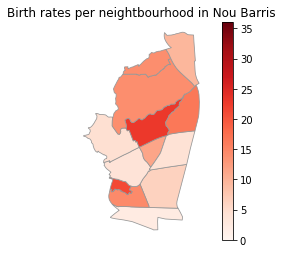

In [94]:
# set the range for the choropleth
vmin, vmax = 0, 36
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(6, 4))

merged_df_Nou_Barris_15_19.plot(column = 'Nombre', cmap = 'Reds',ax = ax, linewidth = 0.8, edgecolor = '0.6',vmin = 0, vmax = 36)
# add a title
plt.axis('off')
plt.title('Birth rates per neightbourhood in Nou Barris')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm,ax=ax)
#saving our map as .png file.
fig.savefig('Nou_Barris.png', dpi=300)


**- Sants-Montjuïc**

In [91]:
#Now we do the same for Sants-Montjuic
#Firstly we are going to deep in the neighbourhood of Nou Barris
birth_Sants_Montjuic_15_19 = birth_15_19[birth_15_19["Nom_Districte"] == "Sants-Montjuïc"]
# Mostrar el nuevo DataFrame (opcional)
desired_columns = ["Nom_Districte", "Codi_Barri", "Nom_Barri", "Nombre"]

# Filtrar el DataFrame original y conservar solo las columnas deseadas
birth_Sants_Barris_filtered = birth_Sants_Montjuic_15_19[desired_columns]

birth_Sants_Barris_filtered

,Nom_Districte,Codi_Barri,Nom_Barri,Nombre
959,Sants-Montjuïc,11,el Poble Sec,6.5
960,Sants-Montjuïc,12,la Marina del Prat Vermell,36.0
961,Sants-Montjuïc,13,la Marina de Port,7.4
962,Sants-Montjuïc,14,la Font de la Guatlla,3.2
963,Sants-Montjuïc,15,Hostafrancs,11.3
964,Sants-Montjuïc,16,la Bordeta,1.8
965,Sants-Montjuïc,17,Sants - Badal,5.1
966,Sants-Montjuïc,18,Sants,4.3


In [92]:
# Convertir la columna Codi_Barri a tipo object en birth_Nou_Barris_15_19
birth_Sants_Montjuic_15_19['Codi_Barri'] = birth_Sants_Montjuic_15_19['Codi_Barri'].astype(str)

# Fusionar los DataFrames en base a la columna "Codi_Barri" y "BARRI"
merged_df_Sants_Montjuic_15_19 = pd.merge(Sants_Montjuic, birth_Sants_Montjuic_15_19, left_on='BARRI', right_on='Codi_Barri', how='inner')

# Mostrar el DataFrame fusionado (opcional)
merged_df_Sants_Montjuic_15_19

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,COL_DESCR,HEX_COLOR7,geometry,Anys_Periode,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((428042.157 4579741.663, 428051.277 4...",2016-2020,3,Sants-Montjuïc,13,la Marina de Port,7.4,15-19
1,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((428820.058 4580133.022, 428808.617 4...",2016-2020,3,Sants-Montjuïc,14,la Font de la Guatlla,3.2,15-19
2,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431112.232 4580476.980, 431107.670 4...",2016-2020,3,Sants-Montjuïc,11,el Poble Sec,6.5,15-19
3,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"MULTIPOLYGON (((431136.380 4580480.334, 431170...",2016-2020,3,Sants-Montjuïc,12,la Marina del Prat Vermell,36.0,15-19
4,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((428492.504 4581161.799, 428583.119 4...",2016-2020,3,Sants-Montjuïc,15,Hostafrancs,11.3,15-19
5,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((428216.747 4580488.510, 428243.765 4...",2016-2020,3,Sants-Montjuïc,16,la Bordeta,1.8,15-19
6,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((427274.354 4580866.514, 427284.862 4...",2016-2020,3,Sants-Montjuïc,17,Sants - Badal,5.1,15-19
7,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((428257.967 4581122.403, 428257.916 4...",2016-2020,3,Sants-Montjuïc,18,Sants,4.3,15-19


c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


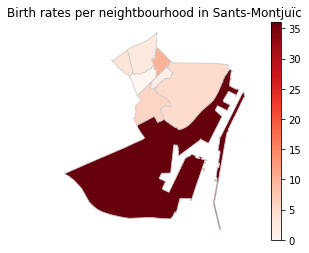

In [96]:
# set the range for the choropleth
vmin, vmax = 0, 36
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(6, 4))

merged_df_Sants_Montjuic_15_19.plot(column = 'Nombre', cmap = 'Reds',ax = ax, linewidth = 0.8, edgecolor = '0.8')
# add a title
plt.axis('off')
plt.title('Birth rates per neightbourhood in Sants-Montjuïc')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm,ax=ax)
#saving our map as .png file.
fig.savefig('Sants-Montjuic.png', dpi=300)


## Edad entre 20-34

In [50]:
#Now we will study other range of ages
birth_rate_df[birth_rate_df['Age'] == '20-34'].sort_values(by=['Nombre'], ascending=False).head(15)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
960,3,Sants-Montjuïc,12,la Marina del Prat Vermell,91.7,20-34
1005,9,Sant Andreu,57,la Trinitat Vella,81.0,20-34
990,7,Horta-Guinardó,42,la Clota,76.9,20-34
1003,8,Nou Barris,55,Ciutat Meridiana,70.6,20-34
1002,8,Nou Barris,54,Torre Baró,68.8,20-34
1004,8,Nou Barris,56,Vallbona,66.4,20-34
1007,9,Sant Andreu,59,el Bon Pastor,65.4,20-34
1006,9,Sant Andreu,58,Baró de Viver,65.4,20-34
998,8,Nou Barris,50,les Roquetes,64.8,20-34
1017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,64.4,20-34


**Nou Barris**

In [98]:
#Particularizamos para Nou Barris

birth_Nou_Barris_20_34 = birth_20_34[birth_20_34["Nom_Districte"] == "Nou Barris"]
# Mostrar el nuevo DataFrame (opcional)
desired_columns = ["Nom_Districte", "Codi_Barri", "Nom_Barri", "Nombre"]

# Filtrar el DataFrame original y conservar solo las columnas deseadas
birth_Nou_Barris_filtered = birth_Nou_Barris_20_34[desired_columns]

# Convertir la columna Codi_Barri a tipo object en birth_Nou_Barris_15_19
birth_Nou_Barris_20_34['Codi_Barri'] = birth_Nou_Barris_20_34['Codi_Barri'].astype(str)

# Fusionar los DataFrames en base a la columna "Codi_Barri" y "BARRI"
merged_df_Nou_Barris_20_34 = pd.merge(Nou_Barris, birth_Nou_Barris_20_34, left_on='BARRI', right_on='Codi_Barri', how='inner')


c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


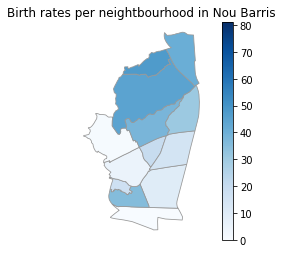

In [107]:
# set the range for the choropleth
vmin, vmax = 0, 91
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(6, 4))

#sm = plt.cm.ScalarMappable(cmap='Reds', norm=)

plt.Normalize(vmin=vmin, vmax=50)

merged_df_Nou_Barris_20_34.plot(column = 'Nombre', cmap = 'Blues',ax = ax, linewidth = 0.8, edgecolor = '0.6',vmax = 91)
# add a title
plt.axis('off')
plt.title('Birth rates per neightbourhood in Nou Barris')
# Create colorbar as a legend


sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
#saving our map as .png file.
fig.savefig('Nou_Barris_20_34.png', dpi=300)


**Sant Andreu**

In [53]:
#Particularizamos para Saint Andreu
birth_Sant_Andreu_20_34 = birth_20_34[birth_20_34["Nom_Districte"] == "Sant Andreu"]
# Mostrar el nuevo DataFrame (opcional)
desired_columns = ["Nom_Districte", "Codi_Barri", "Nom_Barri", "Nombre"]

# Filtrar el DataFrame original y conservar solo las columnas deseadas
birth_Sant_Andreu_20_34_filtered = birth_Sant_Andreu_20_34[desired_columns]

# Convertir la columna Codi_Barri a tipo object en birth_Nou_Barris_15_19
birth_Sant_Andreu_20_34['Codi_Barri'] = birth_Sant_Andreu_20_34['Codi_Barri'].astype(str)

# Fusionar los DataFrames en base a la columna "Codi_Barri" y "BARRI"
merged_df_Sant_Andreu_20_34 = pd.merge(Sant_Andreu, birth_Sant_Andreu_20_34, left_on='BARRI', right_on='Codi_Barri', how='inner')

merged_df_Sant_Andreu_20_34

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,COL_DESCR,HEX_COLOR7,geometry,Anys_Periode,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((432227.042 4585567.959, 432318.659 4...",2016-2020,9,Sant Andreu,63,Navas,43.6,20-34
1,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((432158.516 4590377.238, 432158.904 4...",2016-2020,9,Sant Andreu,57,la Trinitat Vella,81.0,20-34
2,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((432890.036 4588199.376, 432802.680 4...",2016-2020,9,Sant Andreu,58,Baró de Viver,65.4,20-34
3,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((433958.497 4587153.701, 433875.445 4...",2016-2020,9,Sant Andreu,59,el Bon Pastor,65.4,20-34
4,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((432920.118 4588793.955, 432908.394 4...",2016-2020,9,Sant Andreu,60,Sant Andreu,47.7,20-34
5,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431884.639 4586663.729, 431948.799 4...",2016-2020,9,Sant Andreu,61,la Sagrera,42.7,20-34
6,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431545.154 4585646.675, 431536.059 4...",2016-2020,9,Sant Andreu,62,el Congrés i els Indians,43.9,20-34


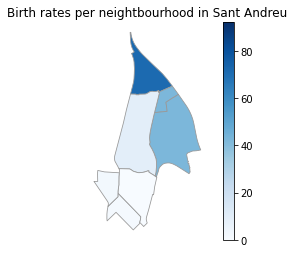

In [109]:
# set the range for the choropleth
vmin, vmax = 0, 81
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(6, 4))

merged_df_Sant_Andreu_20_34.plot(column = 'Nombre', cmap = 'Blues',ax = ax, linewidth = 0.8, edgecolor = '0.6',vmax = 92)
# add a title
plt.axis('off')
plt.title('Birth rates per neightbourhood in Sant Andreu')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=92))

sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm,ax=ax)
#saving our map as .png file.
fig.savefig('Sant_Andreu_20_34.png', dpi=300)


**Sants Montjuïc**

In [115]:
#Particularizamos para Saints Montjuic
birth_Sants_Montjuic_20_34 = birth_20_34[birth_20_34["Nom_Districte"] == "Sants-Montjuïc"]
# Mostrar el nuevo DataFrame (opcional)
desired_columns = ["Nom_Districte", "Codi_Barri", "Nom_Barri", "Nombre"]

# Filtrar el DataFrame original y conservar solo las columnas deseadas
birth_Sants_Montjuic_20_34_filtered = birth_Sants_Montjuic_20_34[desired_columns]

# Convertir la columna Codi_Barri a tipo object en birth_Nou_Barris_15_19
birth_Sants_Montjuic_20_34['Codi_Barri'] = birth_Sants_Montjuic_20_34['Codi_Barri'].astype(str)

# Fusionar los DataFrames en base a la columna "Codi_Barri" y "BARRI"
merged_df_Sants_Montjuic_20_34 = pd.merge(Sants_Montjuic, birth_Sants_Montjuic_20_34, left_on='BARRI', right_on='Codi_Barri', how='inner')

merged_df_Sants_Montjuic_20_34

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,COL_DESCR,HEX_COLOR7,geometry,Anys_Periode,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((428042.157 4579741.663, 428051.277 4...",2016-2020,3,Sants-Montjuïc,13,la Marina de Port,50.7,20-34
1,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((428820.058 4580133.022, 428808.617 4...",2016-2020,3,Sants-Montjuïc,14,la Font de la Guatlla,27.7,20-34
2,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((431112.232 4580476.980, 431107.670 4...",2016-2020,3,Sants-Montjuïc,11,el Poble Sec,41.2,20-34
3,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"MULTIPOLYGON (((431136.380 4580480.334, 431170...",2016-2020,3,Sants-Montjuïc,12,la Marina del Prat Vermell,91.7,20-34
4,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((428492.504 4581161.799, 428583.119 4...",2016-2020,3,Sants-Montjuïc,15,Hostafrancs,39.4,20-34
5,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((428216.747 4580488.510, 428243.765 4...",2016-2020,3,Sants-Montjuïc,16,la Bordeta,44.1,20-34
6,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((427274.354 4580866.514, 427284.862 4...",2016-2020,3,Sants-Montjuïc,17,Sants - Badal,41.0,20-34
7,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,NULL,#73A88F,"POLYGON ((428257.967 4581122.403, 428257.916 4...",2016-2020,3,Sants-Montjuïc,18,Sants,38.5,20-34


c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


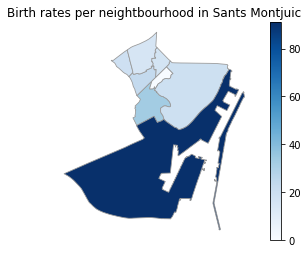

In [105]:
# set the range for the choropleth
vmin, vmax = 0, 91
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(6, 4))

merged_df_Sants_Montjuic_20_34.plot(column = 'Nombre', cmap = 'Blues',ax = ax, linewidth = 0.8, edgecolor = '0.6')
# add a title
plt.axis('off')
plt.title('Birth rates per neightbourhood in Sants Montjuic')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm,ax=ax)
#saving our map as .png file.
fig.savefig('Sants_Montjuic_20_34.png', dpi=300)

# Edad entre 35-49

In [110]:
#Now we will study other range of ages
birth_rate_df[birth_rate_df['Age'] == '35-49'].sort_values(by=['Nombre'], ascending=False).head(15)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
1015,10,Sant Martí,67,la Vila Olímpica del Poblenou,40.8,35-49
980,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,40.2,35-49
974,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,38.9,35-49
979,6,Gràcia,31,la Vila de Gràcia,38.9,35-49
1014,10,Sant Martí,66,el Parc i la Llacuna del Poblenou,38.2,35-49
1017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,37.9,35-49
967,4,Les Corts,19,les Corts,36.9,35-49
975,5,Sarrià-Sant Gervasi,27,el Putxet i el Farró,36.4,35-49
971,5,Sarrià-Sant Gervasi,23,Sarrià,36.1,35-49
978,6,Gràcia,30,la Salut,35.8,35-49


**Sant Martí**

In [116]:
#Particularizamos para Saints Montjuic
birth_Sant_Marti_35_49 = birth_35_49[birth_35_49["Nom_Districte"] == "Sants-Montjuïc"]
# Mostrar el nuevo DataFrame (opcional)
desired_columns = ["Nom_Districte", "Codi_Barri", "Nom_Barri", "Nombre"]

# Filtrar el DataFrame original y conservar solo las columnas deseadas
birth_Sant_Marti_35_49_filtered = birth_Sant_Marti_35_49[desired_columns]

# Convertir la columna Codi_Barri a tipo object en birth_Nou_Barris_15_19
birth_Sant_Marti_35_49['Codi_Barri'] = birth_Sant_Marti_35_49['Codi_Barri'].astype(str)

# Fusionar los DataFrames en base a la columna "Codi_Barri" y "BARRI"
merged_df_Sant_Marti_35_49 = pd.merge(Sant_Marti, birth_Sant_Marti_35_49, left_on='BARRI', right_on='Codi_Barri', how='inner')

merged_df_Sant_Marti_35_49

c:\users\usuario\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,COL_DESCR,HEX_COLOR7,geometry,Anys_Periode,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
